In [1]:
 import sys
print(sys.executable) 

C:\03_CHM SESSION JULY-DECEMBER 2024WISDOM CLASS\DATA SCIENCE-MACHINE LEARNING\myenv_dscience\Scripts\python.exe


## Exercise

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy 
of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width 
3. Petal Length 
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

<img height=300 width=300 src="iris_petal_sepal.png" />

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [52]:
import warnings
warnings.filterwarnings("ignore")
%pwd

'C:\\03_CHM SESSION JULY-DECEMBER 2024WISDOM CLASS\\DATA SCIENCE-MACHINE LEARNING\\Lecture 5- Classification Models (Stdnts)'

In [53]:
# Loadd all the datasets
iris = load_iris()

In [54]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [55]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [56]:
# Converting the digits.data to Dataframe
iris_df = pd.DataFrame(data=iris.data,
columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [58]:
float64_List = iris_df.select_dtypes(include = "float64").columns
print (float64_List)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [59]:
# The int64 is too big, reduce it to int16, there are int16, int32, int64
# Changing all the columns with the object data type to string
for column in float64_List:
    iris_df[column] =  iris_df[column].astype ("float16")
    
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float16
 1   sepal width (cm)   150 non-null    float16
 2   petal length (cm)  150 non-null    float16
 3   petal width (cm)   150 non-null    float16
dtypes: float16(4)
memory usage: 1.3 KB


In [60]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [61]:

# Extracting the first 12 rows
iris_df[0:12]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.101562,3.500000,1.400391,0.199951
1,4.898438,3.000000,1.400391,0.199951
2,4.699219,3.199219,1.299805,0.199951
3,4.601562,3.099609,1.500000,0.199951
4,5.000000,3.599609,1.400391,0.199951
5,5.398438,3.900391,1.700195,0.399902
6,4.601562,3.400391,1.400391,0.300049
7,5.000000,3.400391,1.500000,0.199951
8,4.398438,2.900391,1.400391,0.199951
9,4.898438,3.099609,1.500000,0.099976


In [63]:
# Get the features (petal length and petal width)
X = iris.data[:, 2:]  # Select the 2nd and 3rd columns (petal length and width)

In [64]:
# Get the target labels (flower types)
y = iris.target

In [65]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Checking for null values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [22]:
# Checking the shape of the dataframe
iris_df.shape

(150, 3)

In [23]:
# checking for number of unique values in the target
iris_df.target.nunique()

3

In [67]:
# Create a KNN classifier with k=3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [68]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
# Make predictions on the testing set
y_pred = knn.predict(X_test)

In [70]:

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [71]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [72]:
# Create a meshgrid of points to predict
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

In [73]:
# Predict the class for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


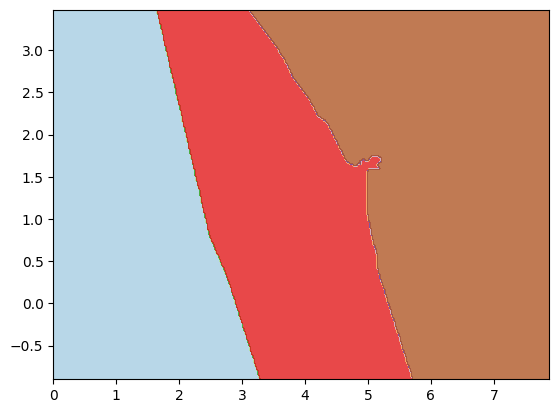

In [74]:
# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

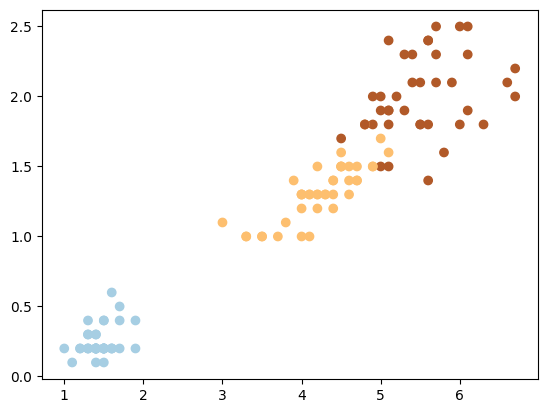

In [77]:
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired,label='Training Data')

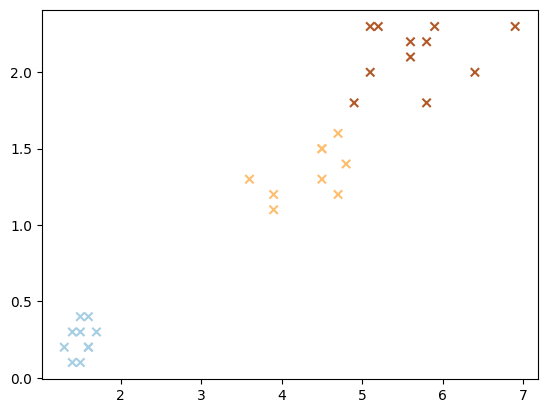

In [78]:
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired,marker='x', label='Testing Data')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


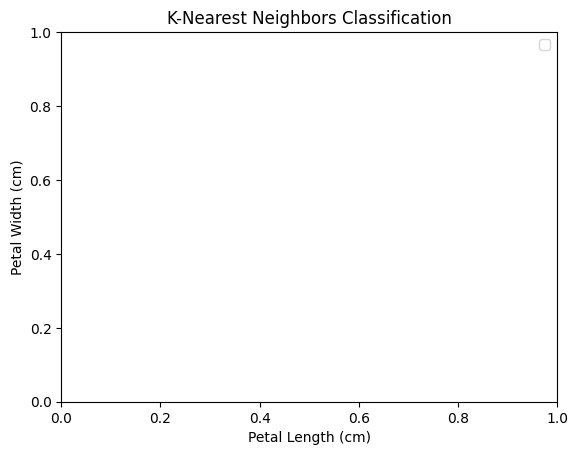

In [83]:
# Add labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Nearest Neighbors Classification')
plt.legend()
